<a href="https://colab.research.google.com/github/Sumanta0511/PlayStore-App-Data-Analysis/blob/main/Sumanta_Hudson_playstore_app_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

##Define the Problem
 

*  The Play Store apps data has enormous potential to drive app-making businesses to success.
*   Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for catergory, rating, size, and more.
*   Another dataset contains customer reviews of the android apps. Explore and analyze the data to discover key factors responsible for app engagement and success.






##Description of Dataset
Let's take a look at the data, which consists of two files:

* Playstore.csv.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

We are going to use a simple csv file "Playstore.csv",Before getting into data, let's have a look at our dataset :-


1.   App :- Name of the App
2.   Category :- Category under which the App falls.
3.   Rating :- Application's rating on playstore
4.  Reviews :- Number of reviews of the App.
5.  Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App


##Breakdown of Dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries
# For example, here's several helpful packages to load
# importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline

In [ ]:
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})
# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
# importing the data from the drive and reading the cs file.
dataset= pd.read_csv('/content/drive/MyDrive/capstone !/play store/Play Store Data.csv')
dataset1=pd.read_csv('/content/drive/MyDrive/capstone !/play store/User Reviews.csv')

In [ ]:
# Lets view data
dataset.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
# Lets check the information of the Play Store data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So these information gives us an idea of our work with different data types and number of rows and columns.

###Correcting data types

From the previous task we noticed that Installs, Size, Rating and Price.  were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read this.

The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. 

In [ ]:
# We use 'unique()' function to show,how many unique values are present in column "Reviews"
dataset["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
# lets convert "Reviews" dtype to int by using "to_numeric()" function
#dataset["Reviews"]=pd.to_numeric(dataset["Reviews"])

In [ ]:
# As we can see thier is error in row 10472 so lets remove it then use the above code aggain
dataset=dataset.drop(10472)

In [ ]:
# lets convert "Reviews" dtype to int aggain 
dataset["Reviews"]=pd.to_numeric(dataset["Reviews"])

In [ ]:
# We use 'unique()' function to show,how many unique values are present in column "Size"
dataset["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# As we can see clearly "size" column contains data in 3 format convert the whole column in one format and rename the column.
dataset.rename(columns = {'Size':'Size(Mb)'}, inplace = True)
# function to convert whole cloumn in one format
def format(value):
  if value[-1:] == "k":
    return float(value[0:-1])/1024
  elif value[-1:] == "M":
    return value
  else:
    return np.nan 


dataset["Size(Mb)"]= dataset["Size(Mb)"].map(lambda x: format(x))
# Replace "M" as we mention already mentioned cloumn unit in column name and converting it to float with "astype()" 
dataset["Size(Mb)"]=dataset["Size(Mb)"].str.replace("M","").astype(float)

In [ ]:
#dataset["Size(Mb)"]=dataset["Size(Mb)"].str.replace("M","").astype(float)
#median=dataset["Size(Mb)"].median()
#dataset["Size(Mb)"]=dataset["Size(Mb)"].replace('np.nan',median)
#dataset["Size(Mb)"]=dataset["Size(Mb)"].fillna(median)

In [ ]:
# We use 'unique()' function to show,how many unique values are present in column "Installs"
dataset["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# lets remove "+" and "," to make it in interger and then use "astype()" to convert its data type to float
dataset["Installs"]=dataset["Installs"].str.replace("+","").str.replace(",","").astype(float)

In [ ]:
# We use 'unique()' function to show,how many unique values are present in column "Price"
dataset['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# replace "$" sign and using "astype()" to convert the "price" column into float
dataset["Price"]=dataset["Price"].str.replace("$","").astype(float)

In [ ]:
#lets confirm our dataset data types aggain.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(Mb)        8829 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


As we can see how all the datatype of columns are correct,so we can move ahead.

### Examining missing/null values in our dataset.

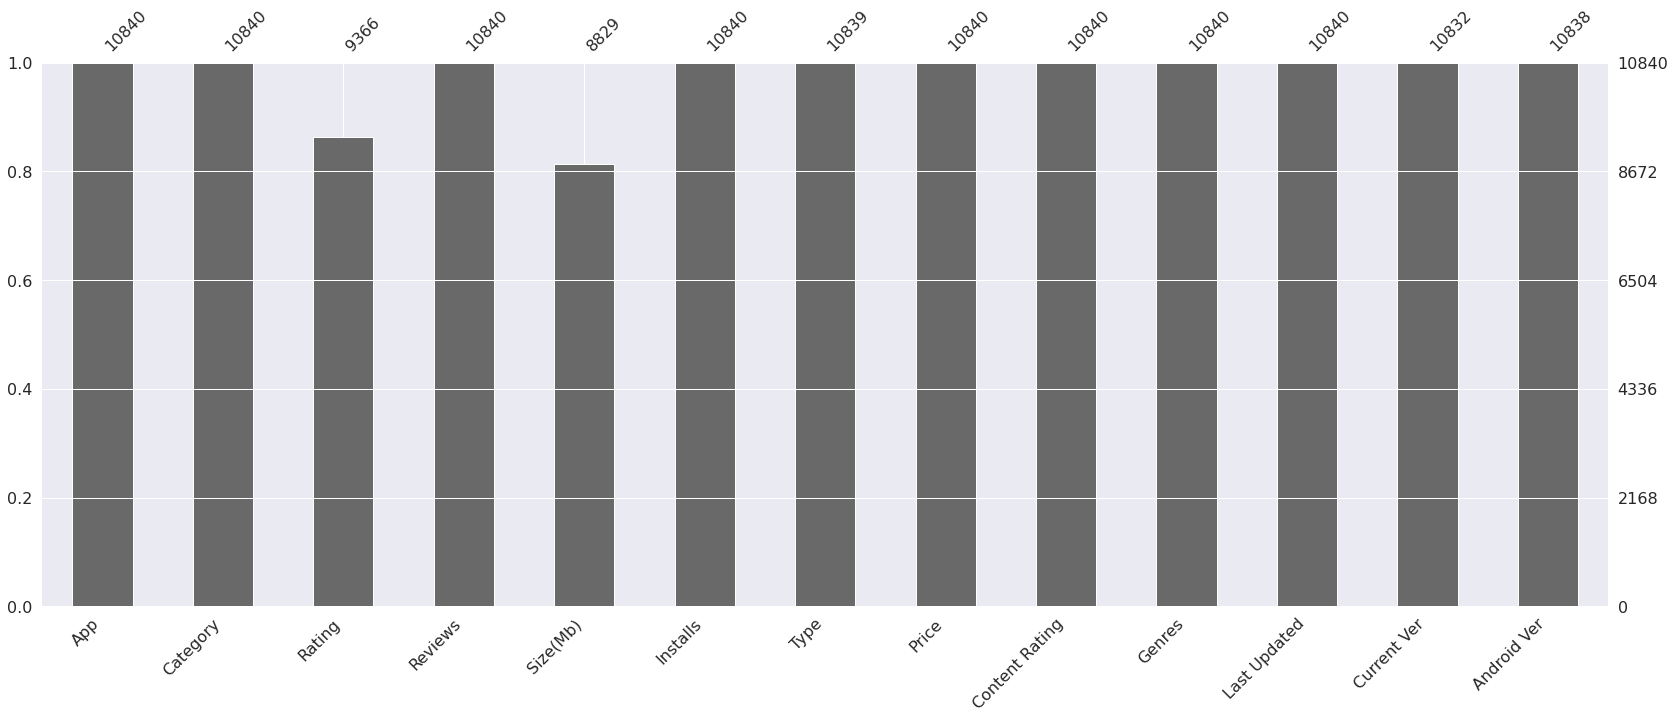

In [ ]:
# We are using missingno lib to visualise missing values of our dataset
import missingno as msno
#msno.matrix(dataset)
msno.bar(dataset)

The Bar graph shows us missing values are more in Rating and Size(Mb) columns.

Now lets check number of null values in all columns

In [ ]:
# We use 'sum()' function to show us how many nulls are found in each column in dataset
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size(Mb)          2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# calculating the null values in percentage.
features_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features_with_nan:
  print('{}:{}% missing values'.format( feature, np.round(dataset[feature].isnull().mean()*100,2 ) ))
  #print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')     

Rating:13.6% missing values
Size(Mb):18.55% missing values
Current Ver:0.07% missing values
Android Ver:0.02% missing values


lets see the same function in other way too for our better understanding.

In [ ]:
# Calculating the null values in percentage.
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.597786
Reviews,Reviews,0.000000
Size(Mb),Size(Mb),18.551661
Installs,Installs,0.000000
Type,Type,0.009225
Price,Price,0.000000
Content Rating,Content Rating,0.000000
Genres,Genres,0.000000


We can see that "Rating" and "Size(Mb)" columns has highest number of missing values of about 13.59 percentage and 18.55 percentage. 

### Data cleaning

* Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.

* By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters (+ , $) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].

* Hence, we now proceed to clean our data. Specifically, the special characters , and + present in Installs column and $ present in Price column need to be removed.

* It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the info() method to acheive this.

lets find Categorical null values and replace them with a new text("Missing")

In [ ]:
# list of Categorical variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print('Number of numerical variables: ', len(categorical_features))
# show the Categorical variables
dataset[categorical_features].head()

Number of numerical variables:  8


,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
## Here we will check the percentage of nan values present in Categorical feature
## 1 -step make the list of features which has missing values
cat_feature_nan=[ feature for feature in dataset.columns
              if dataset[feature].isnull().sum()>1
              and dataset[feature].dtypes == 'O']
for feature in cat_feature_nan:
  #print(feature,np.round(dataset[feature].isnull().mean()*100,2 ))  
  print('{}:{}% missing values'.format( feature, np.round(dataset[feature].isnull().mean()*100,2 ) ))

Current Ver:0.07% missing values
Android Ver:0.02% missing values


In [ ]:
##  replace missing values with a new label
def replace_cat_feature(dataset,cat_feature_nan):
    # lets make a copy so that our make data will not affected
    data=dataset.copy()
    data[cat_feature_nan]=data[cat_feature_nan].fillna('Missing')
    return data
# lets call the above function 
dataset=replace_cat_feature(dataset,cat_feature_nan)
dataset[cat_feature_nan].isnull().sum()

Current Ver    0
Android Ver    0
dtype: int64

lets find Numerical nan values and replace them with a medain of that column

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# show the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  5


,Rating,Reviews,Size(Mb),Installs,Price
0,4.1,159,19.0,10000.0,0.0
1,3.9,967,14.0,500000.0,0.0
2,4.7,87510,8.7,5000000.0,0.0
3,4.5,215644,25.0,50000000.0,0.0
4,4.3,967,2.8,100000.0,0.0


In [ ]:
## Here we will check the percentage of nan values present in numerical feature
## 1 -step make the list of features which has missing values
numerical_nan=[feature for feature in dataset.columns 
                if dataset[feature].isnull().sum()>1
                and dataset[feature].dtypes!='O' ]
  ## 2- step print the feature name and the percentage of missing values
for feature in numerical_nan:
    print("{}:{}% misiing values".format( feature, np.round(dataset[feature].isnull().mean()*100,2)))  

Rating:13.6% misiing values
Size(Mb):18.55% misiing values


In [ ]:
## 3-Replacing the numerical Missing Values

for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_nan].isnull().sum()

Rating      0
Size(Mb)    0
dtype: int64

In [ ]:
# we use "fillna" function to fill the null vlaue with text("Free") in column "Type"
dataset['Type']=dataset['Type'].fillna("Free")

In [ ]:
#check aggain for any null values
# We use 'sum()' function to show us how many nulls are found in each column in dataset
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size(Mb)          0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Ratingnan         0
Size(Mb)nan       0
dtype: int64

as we can see our dataset is cleaned and we can work on exploratory data analysis

In [ ]:
# lets drop unwanted columns
dataset.drop(["Ratingnan","Size(Mb)nan","Last Updated","Genres","Current Ver"],axis=1,inplace=True)

In [ ]:
# save the cleaned file in directory so that we move to next step.
dataset.to_csv('/content/drive/MyDrive/capstone !/play store/Play Store cleaned1.csv',index=False)

###Exploratory data analysis or Story telling

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.



* lets make our exploratory data analysis more amazing by asuming it as a story telling, just like any other story thier will be one main character "Installs" around which our whole story will roam and we will discover who is his friends, foes and the ones doesn't care about it.

* As we can see thier is one more character who is just the duplicate of "Category" that is "genres", so our main task is to remove it from story, so that the audience will not get confused between the "Category" and "genres",along with it we will remove some other characters as well, as you know we can represent only important scenarios that it related to our main character.


* lets move to visualization part, we will transform our character to a state where it is really easy for our audience to get an idea about it.

####Observation 1

* Now we'll get into the fun part. We will try different visualization techniques to understand the life of our main character "Installs" and other characters.

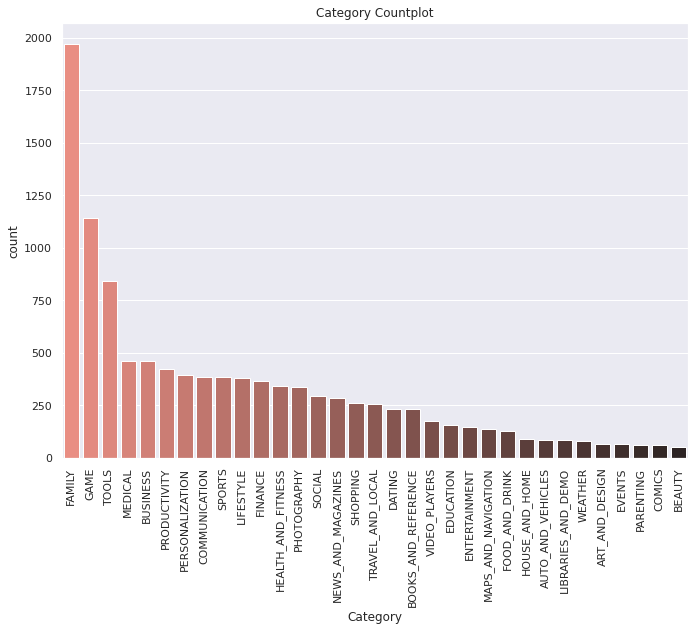

In [ ]:
# ploting countplot for "Category" column
sns.countplot('Category',data=dataset,
              order=dataset.Category.value_counts().index,palette="dark:salmon_r")

plt.title("Category Countplot")
plt.xticks(rotation=90)
# Setting Figure style for visualisation
sns.set_style("white")
#sns.cubehelix_palette("ch:start=2, rot=0, dark=0, light=.95", reverse=True)



Now we know that 'Family' and 'Game' category rules the playstore market, followed by Tools,Medical and Business. Okay Cool ..... Data Analytics will understand our daily requirements and filling the market by similar apps. 

####Observation 2

So lets compare  our main character "installs" with "category" which is one of the other characters.

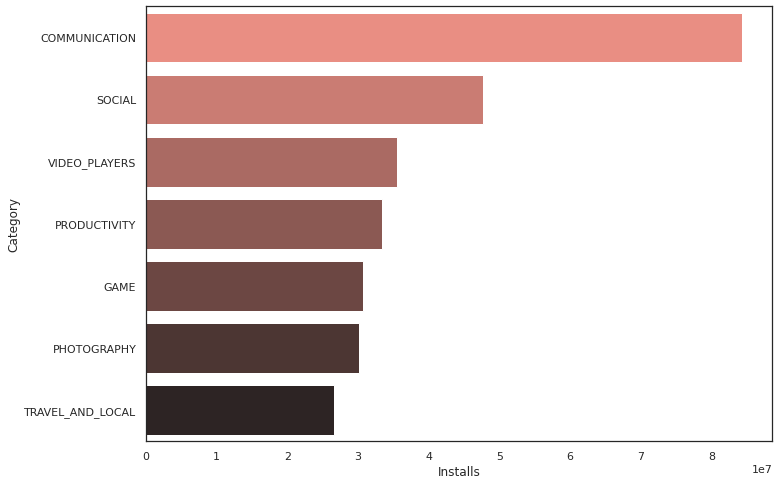

In [ ]:
# here we are using group by functio to group category and installs.
scene1=(dataset.groupby("Category").agg({"Installs":"mean"})
        .sort_values(by="Installs",ascending=False)
        .reset_index().head(7))
point_1=pd.DataFrame(scene1)
point_1
# we are plotting bar plot for above grouped dataframe
sns.barplot(x="Installs",y="Category",data=point_1,palette="dark:salmon_r")

Woww... Family betrayed our 'Installs'.As we have seen so far, list of Top 7 Charactersticks of 'Category' (acc. to number of apps developed) and Top 6 Charactersticks (acc. to number of Installs) differ a lot.

We can feel this story. As a data analyst, we can use this information to decide our future insights.

####Correlation check

Till now, our story has been building slowly. Now let's increase its pace and see the relationship of our hero 'Installs' with other characters......

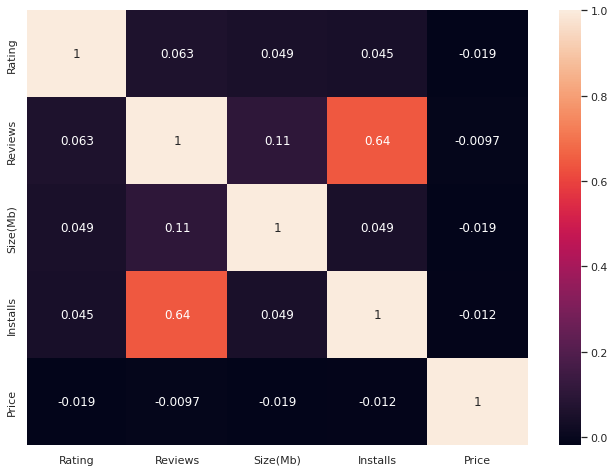

In [ ]:
# heatmap syntax(always ploted on correlation)
sns.heatmap(dataset.corr(),annot=True,robust=True)
# Setting Figure style for visualisation

# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

isn't suprising that our main character is so alone in the story,no neighbour cares about him. They all are completely uncorrelated except Reviews. 
Reviews seems to have some effect on number of Installs, BUT WAIT We can be wrong here. It can be a minor data leakage condition. With more installs comes more reviews will come in our story/dataset. So they are more codependant.

####Observation 3

lets see some other characters also like "ratings" for which we are usuing voilin plot and density plot that makes our story content more interesting in visual aspects.

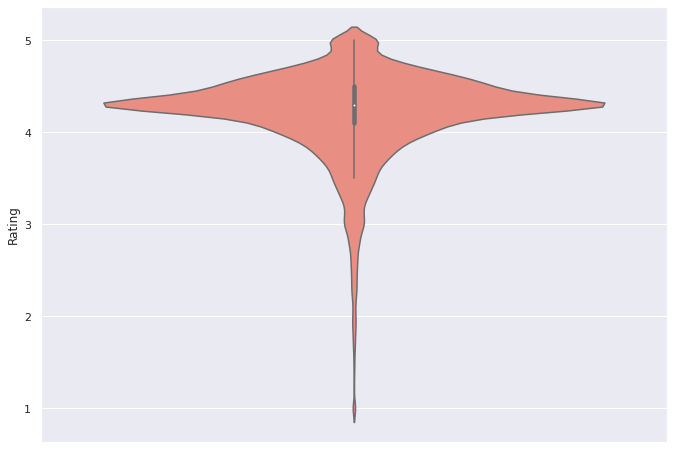

In [ ]:
sns.violinplot(y="Rating",data=dataset,palette="dark:salmon_r" )
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

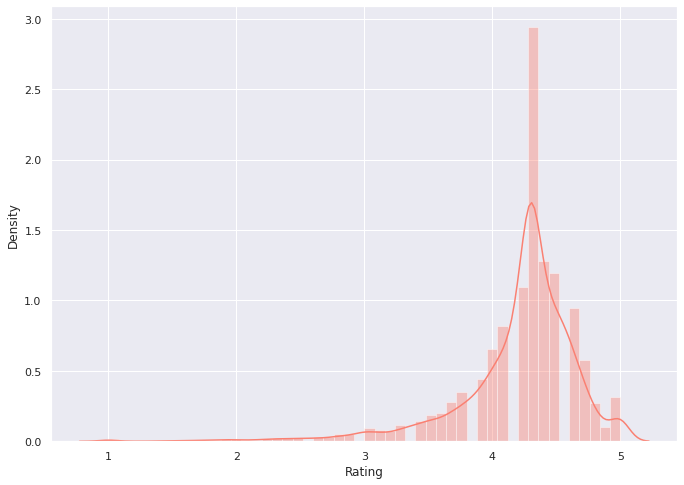

In [ ]:
sns.distplot(dataset["Rating"],color="salmon")
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

as we can see the maximum rating charactersticks lies between 4-4.5 which indicates some flaws will be still thier in Apps that stops the person or audience to rate it with 5 stars on playstore.

####Observation 4

 our hero 'Installs' moves forward on his journey. He has two paths to go :- 'Free' and 'Paid'. Let's see what happens now and what moves our hero

In [ ]:
scene3=dataset.groupby("Type").agg({"Installs":"mean"}).reset_index()
point_3=pd.DataFrame(scene3)
point_3

,Type,Installs
0,Free,1.668929e+07
1,Paid,9.119510e+04


Text(0.5, 1.0, 'Sentiment count in percentage')

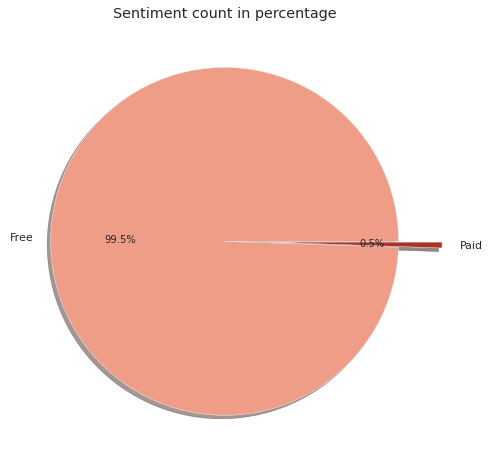

In [ ]:
plt.style.use("ggplot")
slices=point_3.Installs
labels=['Free','Paid']
explode=[0,0.25]
colors = ['#EF9D87','#AB3325']

plt.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plt.title("Sentiment count in percentage")

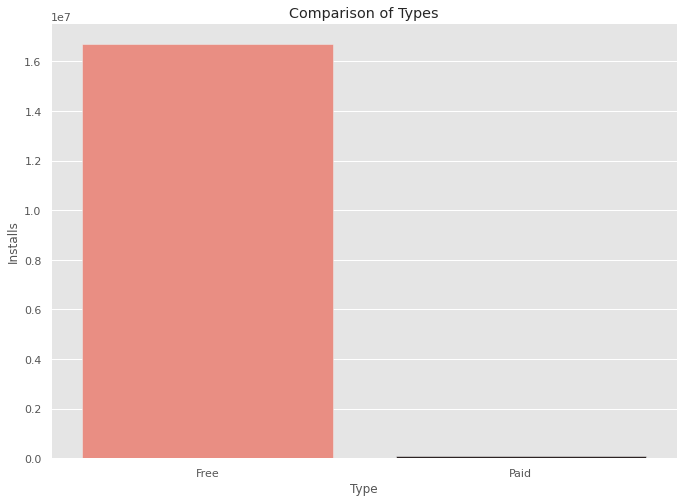

In [ ]:
 scene3=dataset.groupby("Type").agg({"Installs":"mean"}).reset_index()
point_3=pd.DataFrame(scene3)
# we are plotting bar plot for above grouped dataframe
sns.barplot(x="Type",y="Installs",data=point_3,palette="dark:salmon_r")
plt.title("Comparison of Types")
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

Yea... I know ... It was a boring part... It turns that in our storyline we have two path ... 'Free' and "paid" which is aprox neglegible so lets ignore it.




####Observation 5

Have you ever wondered if the Content Rating of the App plays an impact on its number of installations!!!
Let's feed our curiousity.

Text(0.5, 1.0, 'Comparison of content rating(Number of Apps in Market)')

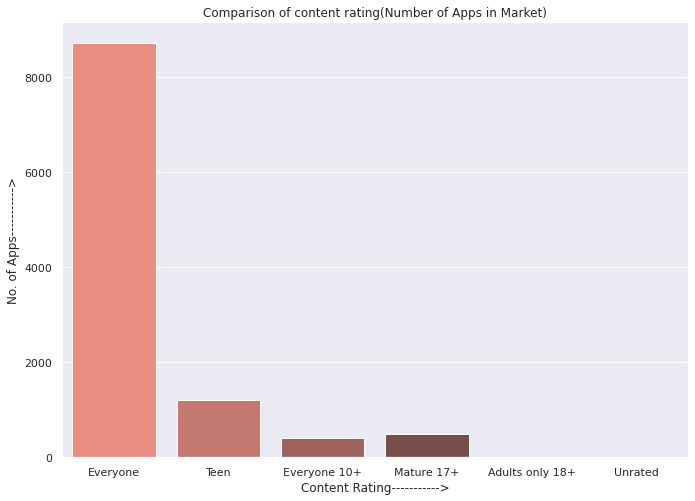

In [ ]:
sns.countplot("Content Rating",data=dataset,palette="dark:salmon_r")
plt.xlabel("Content Rating----------->")
plt.ylabel("No. of Apps----------->")
plt.title("Comparison of content rating(Number of Apps in Market)")

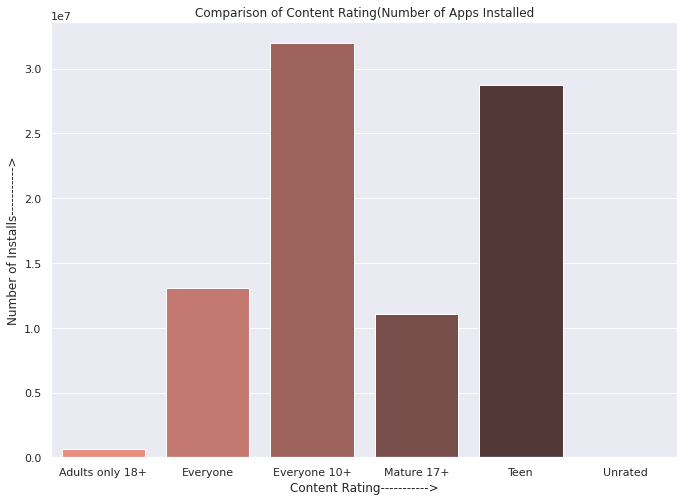

In [ ]:
scene4=dataset.groupby("Content Rating").agg({"Installs":"mean"}).reset_index()
point_4=pd.DataFrame(scene4)
point_4
# we are plotting bar plot for above grouped dataframe
sns.barplot(y="Installs",x="Content Rating",data=point_4,palette="dark:salmon_r")
plt.title("Comparison of Content Rating(Number of Apps Installed")
plt.ylabel("Number of Installs----------->")
plt.xlabel("Content Rating----------->")
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

Okay !! It seems like 'Everyone' is the only choice for us to prefer. But no.... let's dive into this two graphs more to get good intel. Number of 'Teen' Apps are few as compared to 'Everyone' but when we check its 'Number of Installations', it seems like a good second best choice. Few apps but Considerable Installations
Ahaaa !! Our hero 'Install' just got his first good partner XD. Let's interrogate him

Ahhaaa !!! Isn't that like a suspensive movie twist 
* By a little tweak, we have got a completely different story. 'Everyone' is an easy option but 'Teen' and '10+' are the most rewarding.





####Observation 6

lets justify our corelation check story part, which increase our story pace and see the relationship between "installs","Reviews" and "Price". 

In [ ]:
scene2=dataset.groupby('Category').agg({"Installs":"mean","Reviews":"mean","Price":"sum"}).reset_index()
point_2=pd.DataFrame(scene2)

fig = px.line(point_2, x=point_2.Category, y=point_2.columns[:],
              title='Catergory line plot', width=1000)

fig.update_layout(
    updatemenus=[
        dict(
            active=1,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(186)]},
                           {"title": "Temperature in °C over continents",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(186)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(point_2.columns[1:])])
            )])
plt.style.use("fivethirtyeight");
fig.show()

As our hero"Installs" vs "Reviews" have corelation value of 0.64, shows perfect and strong coleration from above line chart as both "installs" and "Reviews" following the same chart aprroximately.

#Part 2

In [ ]:
merged_df = dataset.merge(dataset1, on="App")

In [ ]:
# Lets view data
merged_df.head(5)

,App,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


###Observation 1

The first thing our hero dreamed about is "Sentiments", lets plot piechart that make it easdy to understand the percentage distribution of sentiments in whole data/dream.

Text(0.5, 1.0, 'Sentiment count in percentage')

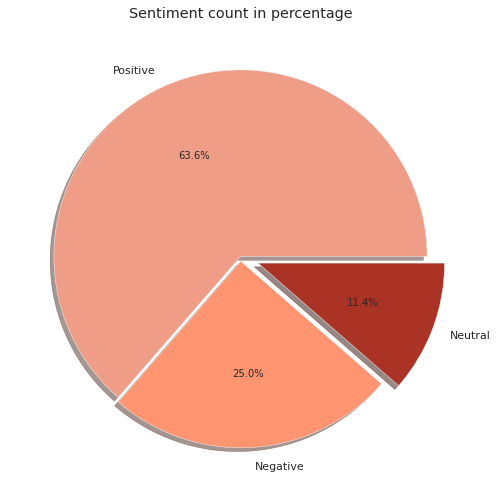

In [ ]:
plt.style.use("ggplot")
slices=merged_df.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
colors = ['#EF9D87','#FF9471','#AB3325']

plt.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plt.title("Sentiment count in percentage")

As its clear from the pie charts there are 64% of Positive sentiments and thats good tooo.

###Observation 2

As sentiments are clear lets deep dive into "Sentiment_Subjectivity"

In [ ]:
group=merged_df.groupby("Sentiment").agg({"Sentiment_Polarity":"sum","Sentiment_Subjectivity":"mean"}).reset_index()
result = pd.DataFrame(group)
result


,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Negative,-4182.804396,0.524795
1,Neutral,0.000000,0.090652
2,Positive,15606.585690,0.554514


In [ ]:
fig = px.line(result, x=result.Sentiment, y=result.columns[2:],
              title='Catergory line plot', width=800)

plt.style.use("fivethirtyeight");
fig.show()

The above line have Sentiment_Subjectivity of 0.55 for Negative sentiments and for Positive sentiments 0.60.

*   Sentiment_Subjectivity > 0.5(refers that mostly it is a public opinion and not a factual information)
 


 

#Conclusion

Yayyy!!! This is the end of our Story Writing. Hope you enjoyed this journey.
In this, we have seen 
1. How every feature has an unique impact on the story
2. Why exploring data is important beforing starting to build ML models 
3. How visualizations make anything interesting. 
4. There's hell lot of comeptition in Android market.

*Thank You !!!!*

---



---

